#YCBS258

##Assignment #3

Vincent Roy ID : 119244546


In [1]:
#import all of the necessay modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import random as rand

from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from keras import backend as K

from sklearn.metrics import r2_score as r2

import quandl

Using TensorFlow backend.


###Step 1 - Import data and preliminary analysis

In [2]:
# get the data for the Coca Cola stock index
data = quandl.get("WIKI/KO")
modelVar = 'Close'

#data = pd.read_csv('sunspot.txt')
#data = quandl.get("WIKI/NASDAQOMX/COMP")
#modelVar = 'Sunspots'

In [3]:
# look at the data
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1962-01-02,101.0,103.75,101.00,101.00,16800.0,0.0,1.0,0.262323,0.269465,0.262323,0.262323,1612800.0
1962-01-03,99.5,99.50,97.25,98.75,32800.0,0.0,1.0,0.258427,0.258427,0.252583,0.256479,3148800.0
1962-01-04,99.0,100.25,99.00,99.50,17600.0,0.0,1.0,0.257128,0.260375,0.257128,0.258427,1689600.0
1962-01-05,99.5,100.75,97.00,97.25,29600.0,0.0,1.0,0.258427,0.261673,0.251934,0.252583,2841600.0
1962-01-08,96.5,96.50,94.38,96.25,42400.0,0.0,1.0,0.250635,0.250635,0.245129,0.249986,4070400.0


In [4]:
# get info on the columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14155 entries, 1962-01-02 to 2018-03-27
Data columns (total 12 columns):
Open           14155 non-null float64
High           14155 non-null float64
Low            14155 non-null float64
Close          14155 non-null float64
Volume         14155 non-null float64
Ex-Dividend    14155 non-null float64
Split Ratio    14155 non-null float64
Adj. Open      14155 non-null float64
Adj. High      14155 non-null float64
Adj. Low       14155 non-null float64
Adj. Close     14155 non-null float64
Adj. Volume    14155 non-null float64
dtypes: float64(12)
memory usage: 1.4 MB


In [5]:
# get the descriptive statistics of each column of the data set
data.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,14155.000000,14155.000000,14155.000000,14155.000000,1.415500e+04,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,1.415500e+04
mean,63.525195,64.067065,62.994742,63.551890,3.657057e+06,0.005346,1.000495,10.328644,10.412381,10.243999,10.333252,9.147155e+06
std,27.232504,27.385077,27.105008,27.245187,5.283107e+06,0.047544,0.025211,12.701618,12.787281,12.618481,12.706384,7.932619e+06
min,28.870000,29.250000,5.180000,28.870000,5.800000e+01,0.000000,1.000000,0.139866,0.140976,0.133837,0.138726,5.568000e+03
25%,42.880000,43.250000,42.500000,42.880000,3.630000e+04,0.000000,1.000000,0.291334,0.293591,0.289110,0.291519,2.760000e+06
50%,54.330000,54.880000,53.750000,54.330000,8.135000e+05,0.000000,1.000000,2.633555,2.663604,2.608941,2.638045,7.864700e+06
75%,76.880000,77.500000,76.250000,76.870000,5.589350e+06,0.000000,1.000000,17.652654,17.852549,17.484096,17.663452,1.296170e+07
max,155.750000,157.250000,155.500000,155.750000,9.896750e+07,0.780000,3.000000,48.210000,48.615000,47.740000,48.530000,1.241690e+08


In [6]:
len(data)


14155

/Users/vince/anaconda3/envs/ml/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


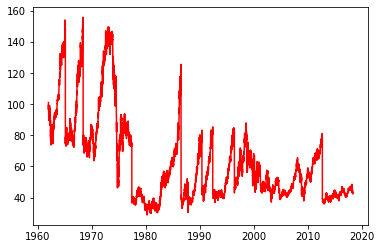

In [7]:
# plot the daily closing values 
fig, ax = plt.subplots()
ax.plot(data.index.values,data[modelVar],'-r')

###Step 2 - Prepare the data for modeling

In [8]:
# extract the single value that we wish to model
data = data[modelVar]

In [12]:
# create blocks of trainging data of 60 values in length
blockLen = 60
X_complete = []
y_complete = []

# create 2000 data blocks
for i in range(2000):
     
    pos = rand.randint(0, len(data)-60)
    
    if pos < (len(data) - blockLen - 1):
    

        temp = data[pos:pos+blockLen].values
        
        temp2 = temp.reshape(blockLen,1)
        
        y = data[pos+blockLen+1]
        
        X_complete.append(temp2)
        y_complete.append(y)

X_complete = np.stack(X_complete)
y_complete = np.stack(y_complete)

y_complete = y_complete.reshape(-1,1)

In [13]:
X_complete.shape

(2000, 60, 1)

In [14]:
# defing function for plotting the data blocks
def plot_series(x, y, color='r'):
  plt.plot(x.reshape(-1), 'o-')
  plt.scatter(61, y, c=color)
  plt.grid(True)

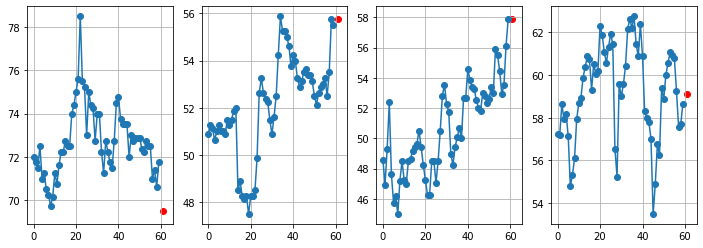

In [15]:
# randomly plot for data blocks
plt.subplots(2,2,figsize=(12,4))

serNumber = rand.randint(0,len(X_complete))
plt.subplot(1, 4, 1)
plot_series(X_complete[serNumber], y_complete[serNumber])

serNumber = rand.randint(0,len(X_complete))
plt.subplot(1, 4, 2)
plot_series(X_complete[serNumber], y_complete[serNumber])

serNumber = rand.randint(0,len(X_complete))
plt.subplot(1, 4, 3)
plot_series(X_complete[serNumber], y_complete[serNumber])

serNumber = rand.randint(0,len(X_complete))
plt.subplot(1, 4, 4)
plot_series(X_complete[serNumber], y_complete[serNumber])

In [17]:
# seperate the the data into a training ,validation and test sets
X_train = X_complete[:1600]
y_train = y_complete[:1600]

X_valid = X_complete[1600:1800]
y_valid = y_complete[1600:1800]

X_test = X_complete[1800:]
y_test = y_complete[1800:]

In [18]:
# create a data set for the visual comparison
temp = data[3000:3000+60].values
X_comp = temp.reshape(60,1)
X_comp = np.array([X_comp])

Y_comp = data[3000+60+1:3000+60+11]
Y_comp = np.array(Y_comp)
Y_comp = Y_comp.reshape(10,1)
Y_comp = np.array([Y_comp])

###Step 3 - Create a time series model with a regular connected neural network

In [48]:
# custom metric function to calculate the coefficion of dertermination R2
def myR2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [49]:
# create, compile and fit the regular MLP
modelMLP = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[60,1]),
    keras.layers.Dense(1, input_shape=[60,1])])

modelMLP.compile(loss='mse', optimizer='adam',metrics=['mae',myR2])

h = modelMLP.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),verbose=0)

In [50]:
# evaluate the MLP model
modelMLP.evaluate(X_test, y_test,verbose=0)

[7.116605119502291, 1.7832906, 0.9876191]

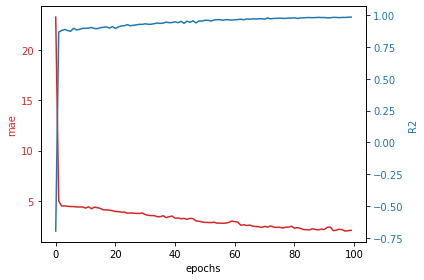

In [56]:
# summarize history for mae and R2 as a function of the epochs
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('mae', color=color)
ax1.plot(h.history['mae'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2', color=color)  # we already handled the x-label with ax1
ax2.plot(h.history['myR2'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [171]:
# make predictions for ten steps ahead
n_steps = 10

XX = X_comp

# just predict the value, add it to X and predict the next one, 10 times
for step_ahead in range(10):
    y_pred_one = modelMLP.predict(XX[:, step_ahead:])[:, np.newaxis, :]
    XX = np.concatenate([XX, y_pred_one], axis=1)

Y_pred = XX[0,-10:]


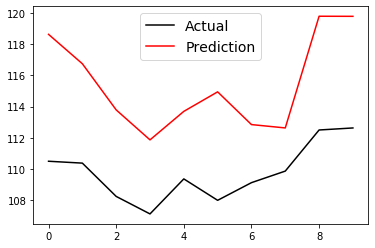

In [172]:
# plot the prediction vs the actual data
plt.plot(Y_comp[0],'-k',label='Actual')
plt.plot(Y_pred,'-r',label='Prediction')
plt.legend(fontsize=14)


The model metric indicates that the model is pretty good (R2 of 0.98), however when the model is used in prediction the first 10 predictions seem to be off.

###Step 4 - Create a time series model with a deep RNN architecture

In [58]:
# create, compile and fit the deep RNN
modelDeepRNN = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)])

modelDeepRNN.compile(loss='mse', optimizer='adam',metrics=['mae',myR2])
h = modelDeepRNN.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid),verbose=0)

In [59]:
# evaluate the deep RNN model
modelDeepRNN.evaluate(X_test, y_test,verbose=0)

[14.883249374146157, 1.7037287, 0.9826491]

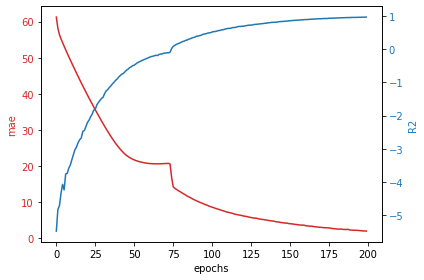

In [60]:
# summarize history for mae and R2 as a function of the epochs
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('mae', color=color)
ax1.plot(h.history['mae'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2', color=color)  # we already handled the x-label with ax1
ax2.plot(h.history['myR2'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [175]:
# make predictions for ten steps ahead
n_steps = 10

XX = X_comp

# just predict the value, add it to X and predict the next one, 10 times
for step_ahead in range(10):
    y_pred_one = modelDeepRNN.predict(XX[:, step_ahead:])[:, np.newaxis, :]
    XX = np.concatenate([XX, y_pred_one], axis=1)

Y_pred = XX[0,-10:]

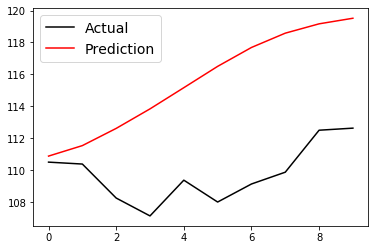

In [176]:
# plot the prediction vs the actual data
plt.plot(Y_comp[0],'-k',label='Actual')
plt.plot(Y_pred,'-r',label='Prediction')
plt.legend(fontsize=14)

The model metric indicates that the model is pretty good (R2 of 0.98), When the model is used in prediction, the first two predictions are good, however this rapidly deteriorates.

###Step 5 - Create a time series model with a deep LSTM architecture

In [177]:
# create, compile and fit the deep RNN
modelLSTM = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dense(1)])

modelLSTM.compile(loss="mse", optimizer="adam", metrics=['mae',myR2])
history = modelLSTM.fit(X_train, y_train, epochs=200,validation_data=(X_valid, y_valid),verbose=0)

In [178]:
# evaluate the deep RNN model
modelLSTM.evaluate(X_test, y_test,verbose=0)

[70.98873536130215, 4.6174383, -5.6873612]

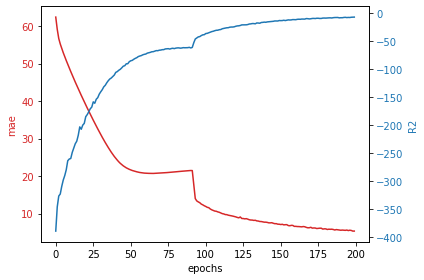

In [184]:
# summarize history for mae and R2 as a function of the epochs
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('mae', color=color)
ax1.plot(history.history['mae'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2', color=color)  # we already handled the x-label with ax1
ax2.plot(history.history['my_coeffDetermination'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

This model is really bad !!! The R2 value for some reason is below 0.